<a href="https://colab.research.google.com/github/00BondViz/Extracting_Tables_From_Images_using_Deep_Learning/blob/main/Extracting_Tables_From_Images_using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#We are using this library/package for text extraction from our sample text images
!pip install -U layoutparser

In [2]:
#For layoutparser to work it needs the detectron2 framework to run in the backend
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-wwxo7mrr/detectron2_576c3e93c5444d35b162cd0ac2fa68e5
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-wwxo7mrr/detectron2_576c3e93c5444d35b162cd0ac2fa68e5
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py) ... done


In [3]:
# WE pip insatll Layoutparser ocr for ocr entities to get installed so that layout parserr can work with them
!pip install layoutparser[ocr]

In [4]:

!git clone https://github.com/Layout-Parser/layout-parser.git

fatal: destination path 'layout-parser' already exists and is not an empty directory.


In [5]:

%cd layout-parser/

/content/layout-parser


In [6]:
#We need to import OpenCv2 to help with converting the images to RGB format.
import cv2
image = cv2.imread("/content/layout-parser/examples/data/image-0077.png")
image = image[..., ::-1]

/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


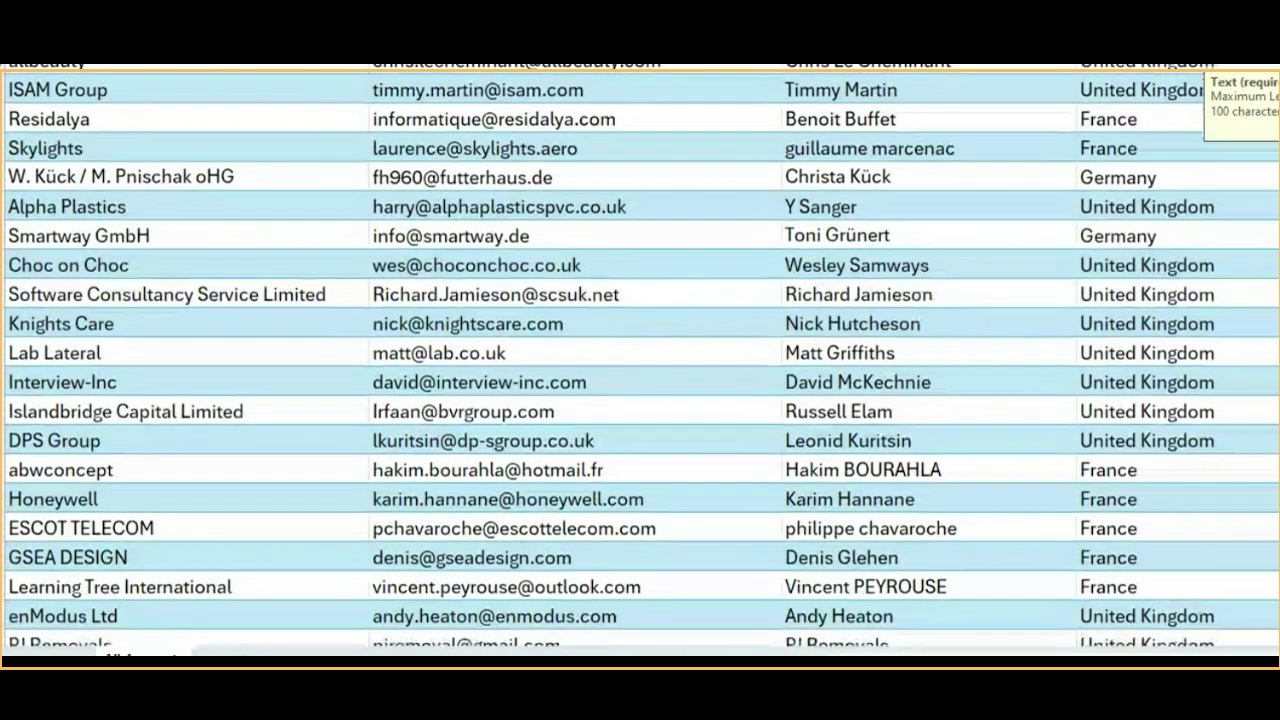

In [7]:
# "After converting the format, wew need to use Delectron2 funtion and we spesicially use the 'TableBank' model. This is because it suites our use case
import layoutparser as lp
model = lp.Detectron2LayoutModel('lp://TableBank/faster_rcnn_R_101_FPN_3x/config',extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.65],
                                 label_map={0: "Table"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)

In [8]:
# The peice of code below tells us the region where our table is located, with use of cordinates. As well as mentioning tha accracy of the table identification (Score= 0.935)
text_blocks = lp.Layout([b for b in layout if b.type=="Table"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=0.0, y_1=70.07911682128906, x_2=1280.0, y_2=668.49755859375), text=None, id=None, type=Table, parent=None, next=None, score=0.9350989460945129)], page_data={})

In [9]:
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [10]:

figure_blocks

Layout(_blocks=[], page_data={})

In [11]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [12]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

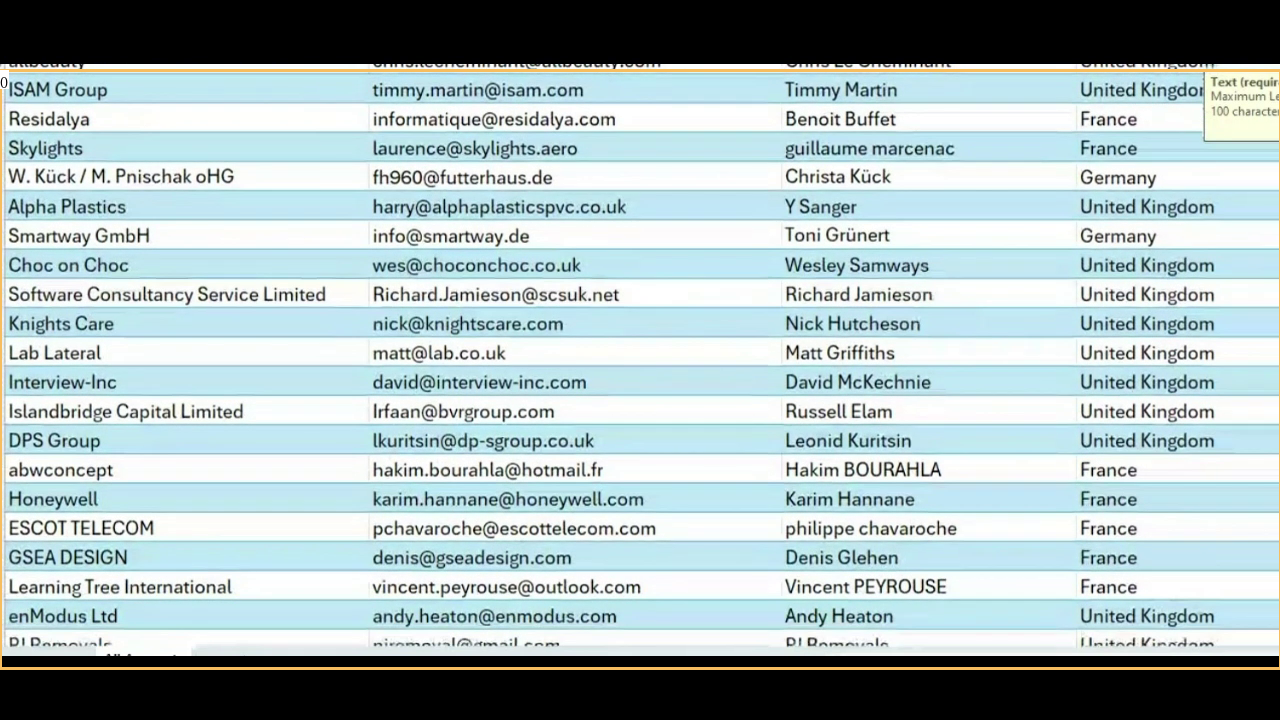

In [13]:
lp.draw_box(image, text_blocks,
            box_width=3,
            show_element_id=True)

In [14]:
ocr_agent = lp.TesseractAgent(languages='eng')
    # Initialize the tesseract ocr engine. You might need
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]

In [15]:

!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [16]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness

    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [17]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')



 

ISAM Group
Residalya
Skylights
W. Kiick / M. Pnischak oHG.
Alpha Plastics
_Smartway GmbH
Choc on Choc
Software Consultancy Service Limited
Knights Care
Lab Lateral
Interview-Inc
Islandbridge Capital Limited
DPS Group
abwconcept
Honeywell
ESCOT TELECOM
_GSEA DESIGN
Learning Tree International

-enModus Ltd
DIDa,

 

 

timmy.martin@isam.com
informatique@residalya.com
laurence@skylights.aero
fh960@futterhaus.de
harry@alphaplasticspvc.co.uk
info@smartway.de
wes@choconchoc.co.uk
Richard Jamieson@scsuk.net
nick@knightscare.com
matt@lab.co.uk
david@interview-inc.com
Irfaan@bvrgroup.com
lkuritsin@dp-sgroup.co.uk
hakim.bourahla@hotmail.fr
karim.hannane@honeywell.com
pchavaroche@escottelecom.com
denis@gseadesign.com
vincent.peyrouse@outlook.com
andy.heaton@enmodus.com

 

 

Timmy Martin
Benoit Buffet
guillaume marcenac
Christa Kiick

Y Sanger

Toni Griinert
Wesley Samways
Richard Jamieson
Nick Hutcheson
Matt Griffiths

David McKechnie
Russell Elam
Leonid Kuritsin
Hakim BOURAHLA
Karim Hannan

In [ ]:
# https://www.youtube.com/watch?v=KElGGK1Kf8I Video to watch for use of model